In [1]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt 

### Load data

In [2]:
faces = fetch_olivetti_faces()

In [3]:
X, y = faces['images'], faces['target']

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

In [5]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [6]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X_train, y_train):
    X_train, X_val = X_train[train_index], X_train[test_index]
    y_train, y_val = y_train[train_index], y_train[test_index]

In [7]:
X_train_flatten = X_train.reshape((X_train.shape[0], -1))
X_val_flatten = X_val.reshape((X_val.shape[0], -1))
X_test_flatten = X_test.reshape((X_test.shape[0], -1))

## KMeans

In [8]:
from sklearn.cluster import KMeans

In [9]:
clusters = [30,40,50,60]
inertia = []
for c in clusters:
    kmeans = KMeans(n_clusters=c)
    kmeans.fit(X_train_flatten)
    inertia.append(kmeans.inertia_)

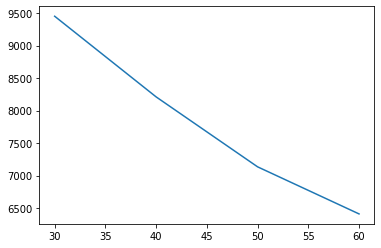

In [10]:
plt.plot(clusters, inertia)

##### Choose 40

In [11]:
kmeans = KMeans(n_clusters=40)
kmeans.fit(X_train_flatten)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=40, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
kmeans.labels_

array([30, 26, 33, 11, 17,  2, 24, 38,  8, 19, 30, 31, 35, 30, 10, 15, 36,
       29,  0,  2, 38, 23,  4, 38, 23,  4, 16, 30, 36, 26, 29, 24, 39, 18,
       23, 39, 24,  6, 12,  1, 32, 24, 11,  8, 33, 28,  6, 36, 29, 25,  2,
        9,  5, 14,  3, 39, 26, 36, 14, 18, 19,  2,  1, 15,  4, 15, 28, 25,
       21, 14, 36, 13,  2, 33, 11, 33, 15, 15, 39,  2, 20, 27, 19, 39,  5,
       23, 31, 36, 13, 26, 10,  6, 38,  8,  6, 10, 36, 27,  7,  0, 13, 39,
       27, 33, 36, 28, 22, 26,  8, 18, 32,  2, 33, 34,  4, 29, 30,  3, 10,
       37, 24,  9,  5, 16,  8,  2, 28, 27, 35, 15,  0, 30,  1, 38,  4,  3,
       13, 23, 20, 28, 24,  4, 14, 17, 25, 14, 27, 12,  4, 10, 25, 12, 26,
       27, 35,  1, 22, 25, 33, 13,  2, 39, 14, 20, 10, 32,  0, 18, 23, 11,
       26, 38,  5,  6, 21, 17,  6, 36, 33,  2, 27, 29,  9, 25, 13, 19, 24,
       36, 36, 28, 36,  4, 21, 38, 25, 32, 11, 16,  4, 11,  5,  8, 14, 29,
       36, 38, 31,  1, 14, 34,  4, 19, 14, 38, 28, 35,  6,  1, 28, 12, 23,
       14,  4,  0, 24, 12

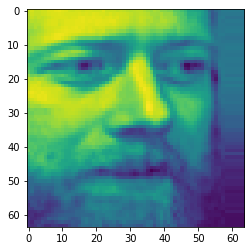

In [13]:
plt.imshow(X_train[6,:])

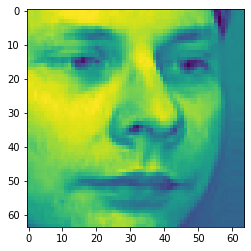

In [14]:
plt.imshow(X_train[7,:])

##### A face from different cluster

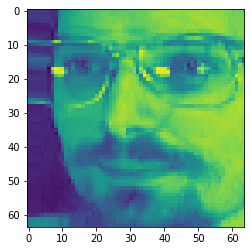

In [15]:
plt.imshow(X_train[8,:])

## Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train_flatten, y_train)
prediction = rf.predict(X_val_flatten)
from sklearn.metrics import accuracy_score
print("Vanilla Classifier score", accuracy_score(prediction, y_val))

Vanilla Classifier score 0.75


In [18]:
from sklearn.pipeline import Pipeline

In [19]:
kmeans = KMeans()
rf = RandomForestClassifier()
pipeline = Pipeline([
    ('kmeans', kmeans),
    ('rf', rf)
])

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {
    "kmeans__n_clusters": [5, 15, 30, 40, 60]
}
search = GridSearchCV(pipeline, param_grid, n_jobs=2, scoring="accuracy")
search.fit(X_train_flatten, y_train)

/Users/weifenghu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/weifenghu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/weifenghu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=8, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini...
                                                        

In [22]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.632):
{'kmeans__n_clusters': 30}


In [23]:
prediction = search.predict(X_val_flatten)
print("KMeans-append Classifier score", accuracy_score(prediction, y_val))

KMeans-append Classifier score 0.6388888888888888


#### Append Features

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
class KMeansAppender(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=8):
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=self.n_clusters)
        
    def fit(self, X, y=None):
        self.kmeans.fit(X)
        return self
    
    def transform(self, X):
        X_clusters = self.kmeans.transform(X)
        result = np.append(X, X_clusters, axis=1)
        return result

In [25]:
kmeansappender = KMeansAppender()
rf_2 = RandomForestClassifier()
pipeline = Pipeline([
    ('kmeansappend', kmeansappender),
    ('rf', rf_2)
])
param_grid = {
    "kmeansappend__n_clusters": [5, 15, 30, 40, 60]
}
search = GridSearchCV(pipeline, param_grid, n_jobs=2, scoring="accuracy")
search.fit(X_train_flatten, y_train)

/Users/weifenghu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/weifenghu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/weifenghu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kmeansappend',
                                        KMeansAppender(n_clusters=8)),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                          

In [26]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.722):
{'kmeansappend__n_clusters': 60}


In [27]:
prediction = search.predict(X_val_flatten)
print("KMeans-append Classifier score", accuracy_score(prediction, y_val))

KMeans-append Classifier score 0.7777777777777778


#### Slightly better performance by appending it to the feature and worse if only uses KMeans feature

## Gaussian Mixture Model

In [28]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=0.99)
X_train_flatten_pca = pca.fit_transform(X_train_flatten)

In [30]:
gm = GaussianMixture(n_components=2, random_state=0)
param_grid = {
    "n_components": [5, 15, 30, 40, 60]
}
search = GridSearchCV(gm, param_grid, n_jobs=2, scoring="accuracy")

In [31]:
search.fit(X_train_flatten_pca, y_train)

/Users/weifenghu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GaussianMixture(covariance_type='full',
                                       init_params='kmeans', max_iter=100,
                                       means_init=None, n_components=2,
                                       n_init=1, precisions_init=None,
                                       random_state=0, reg_covar=1e-06,
                                       tol=0.001, verbose=0,
                                       verbose_interval=10, warm_start=False,
                                       weights_init=None),
             iid='warn', n_jobs=2,
             param_grid={'n_components': [5, 15, 30, 40, 60]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [32]:
search.best_params_

{'n_components': 40}

In [33]:
gm = GaussianMixture(n_components=40, random_state=0)
gm.fit(X_train_flatten_pca, y_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=40, n_init=1,
                precisions_init=None, random_state=0, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [34]:
sample_img = gm.sample()
sample_img = pca.inverse_transform(sample_img[0])
sample_img = sample_img.reshape((1, 64, 64))

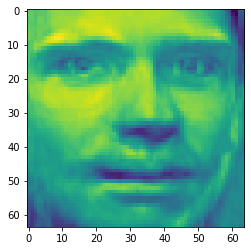

In [35]:
plt.imshow(sample_img[0])

#### Anomaly Detection

In [36]:
anomaly = X_train_flatten[5].reshape((64,64)).T.reshape((-1))
combination = np.append(X_train_flatten[6], anomaly, axis=0).reshape((2, -1))

In [37]:
gm.score_samples(pca.transform(combination))

array([ 1.09275587e+03, -3.43051149e+07])

#### Small value for anomaly image

## Dimensionality Reduction as Anomaly Detection

In [38]:
def reconstruction_error(X_train, X_projected):
    return np.sum((X_train - X_projected) ** 2).mean()

In [39]:
combination_pca = pca.transform(combination)
normal = pca.inverse_transform(combination_pca[0])
print("Reconstruction error for normal image", reconstruction_error(combination[0], normal))

Reconstruction error for normal image 1.3441992


In [40]:
anomaly = pca.inverse_transform(combination_pca[1])
print("Reconstruction error for anomaly image", reconstruction_error(combination[1], anomaly))

Reconstruction error for anomaly image 24.008825


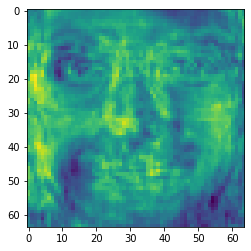

In [41]:
plt.imshow(anomaly.reshape((64, 64)))